# closeのdata augmentation画像

In [1]:
!pwd
!ls ../../..
import sys
sys.path.append("../../../lib/")

from get_current_process_user_home_dir import *

home_dir = get_current_process_user_home_dir()

/home/a/dl_image_manager/projects/close/jupyer_notebook
bin  doc  lib  projects


2022-12-22 16:06:41.206037: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-22 16:06:41.296191: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-22 16:06:41.296209: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-22 16:06:41.318906: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-22 16:06:41.763843: W tensorflow/stream_executor/platform/de

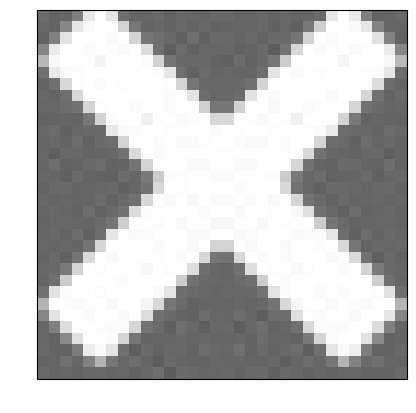

In [2]:
import keras.utils.image_utils as image
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import array_to_img

#アップロードされた画像を読み込み
img = image.load_img(home_dir + "/dl_image_manager/projects/close/master/image.jpg")
#img = image.load_img("~/dl_image_manager/projects/close/master/image.jpg")

#画像をnumpy配列に変換する
img = np.array(img)
#表示画像のサイズを設定
#plt.figure(figsize = (32, 32))
#軸を表示しない
plt.xticks(color = "None")
plt.yticks(color = "None")
plt.tick_params(bottom = False, left = False)
#表示
plt.imshow(img)

In [3]:
#パンケーキの画像配列の形
print(img.shape)
#配列に次元を追加
img_cake=img[np.newaxis, :, :, :]
#次元追加後の配列の形
print(img_cake.shape)

(32, 32, 3)
(1, 32, 32, 3)


In [4]:
#画像表示用の関数を定義
#といいながら、生成した画像データを保存したり、いろいろと下処理をしてしまう。。。
glb_count = 0
def show2(datagen, img):
  global glb_count
  print("===show2", glb_count)
  #表示サイズを設定
  plt.figure(figsize = (10, 5))
  
  #画像をbatch_sizeの数ずつdataに入れる
  #本稿は画像が一枚のため同じ画像がdataに入り続けることになる
  for i, data in enumerate(datagen.flow(img, batch_size = 1, seed = 0)):
    #表示のためnumpy配列からimgに変換する
    show_img = array_to_img(data[0], scale = False)
    #2×3の画像表示の枠を設定＋枠の指定
    #plt.subplot(2, 3, i+1)
    plt.subplot(33, 3, i+1)
    #軸を表示しない
    plt.xticks(color = "None")
    plt.yticks(color = "None")
    plt.tick_params(bottom = False, left = False)
    #画像を表示
    plt.imshow(show_img)
    
    #データのセーブ処理
    #まずはベースとなる416 x 416画像を作る。背景は白(255,255,255)
    base = np.full((416, 416,3), 255)
    base[0:32,0:32] = data[0][0:32,0:32]
    save_img = array_to_img(base, scale = False)
    image.save_img(home_dir + "/dl_image_manager/projects/close/temp/" + str(glb_count) + ".jpg", save_img)
    glb_count += 1
    
    #6回目で繰り返しを強制的に終了
#    if i == 5:
    if i == 98:
      return

===show2 0


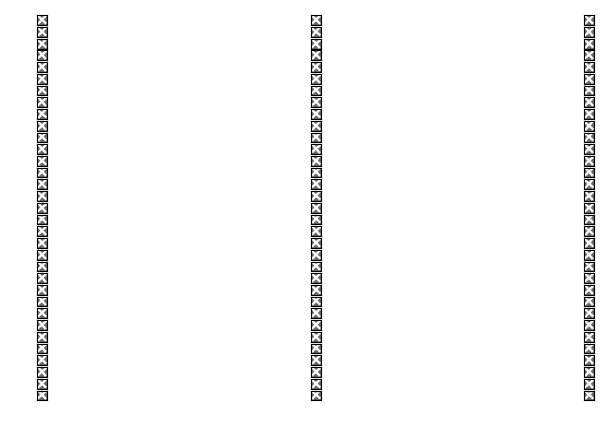

In [5]:
#-180度〜+180度の間でランダムに回転するImageDataGeneratorを作成
#rotation_datagen = ImageDataGenerator(rotation_range = 180)
rotation_datagen = ImageDataGenerator(rotation_range = 5)
#画像を表示
show2(rotation_datagen, img_cake)

In [6]:
#指定されたピクセル（-50〜+50）の範囲で左右にランダム
#このパターンの画像はtrain/validに含めては行けない。かなり崩れた画像担っているため。
#width_datagen = ImageDataGenerator(width_shift_range = 32)
#show2(width_datagen, img_cake)

===show2 99


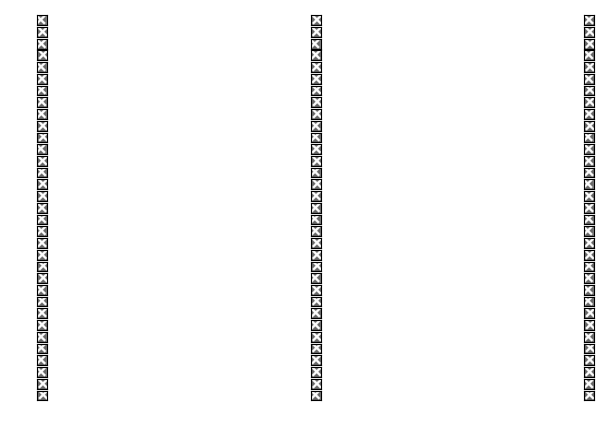

In [7]:
# 指定されたピクセル（-50〜+50）の範囲で上下にランダムに動かします。
#height_datagen = ImageDataGenerator(height_shift_range = 10)
#引数が10だと若干動かし過ぎ感がある
#以下は、補完時に何も指定していない
#height_datagen = ImageDataGenerator(height_shift_range = 5)
height_datagen = ImageDataGenerator(height_shift_range = 5,fill_mode="constant", cval=125)
show2(height_datagen, img_cake)

===show2 198


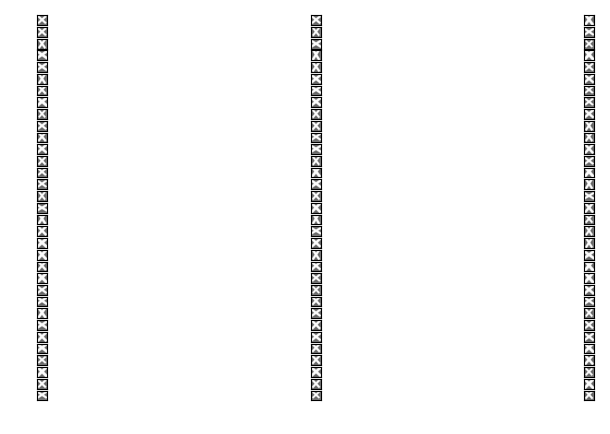

In [8]:
#0.5〜1.5の間でランダムに拡大又は縮小するImageDataGeneratorを作成
zoom_datagen = ImageDataGenerator(zoom_range = [0.7, 1.3],fill_mode="constant", cval=125)
show2(zoom_datagen, img_cake)

===show2 297


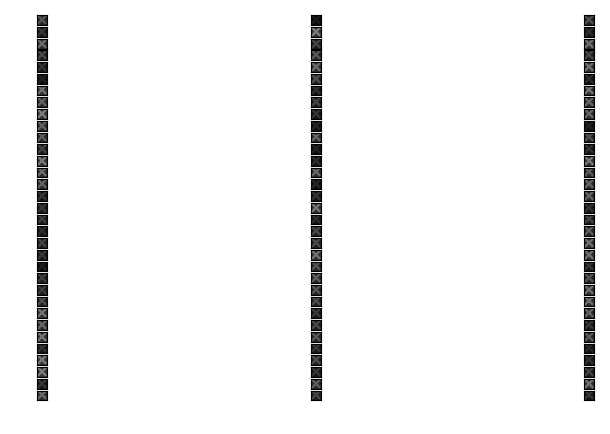

In [9]:
#画像の明るさを0.3〜0.8の間で調整（暗くする）
brightness_datagen = ImageDataGenerator(brightness_range = [0.1, 0.5])
show2(brightness_datagen, img_cake)

===show2 396
===show2 495
===show2 594
===show2 693
===show2 792
===show2 891


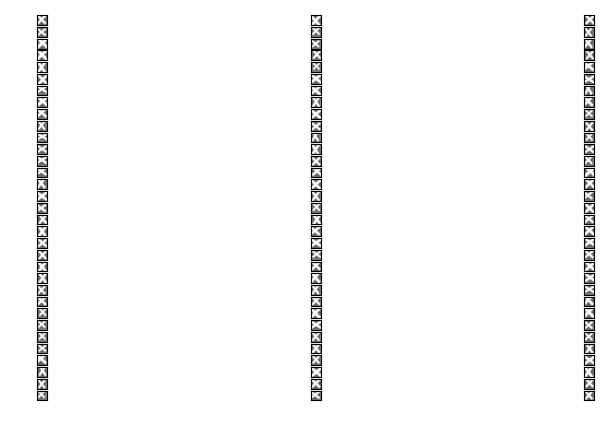

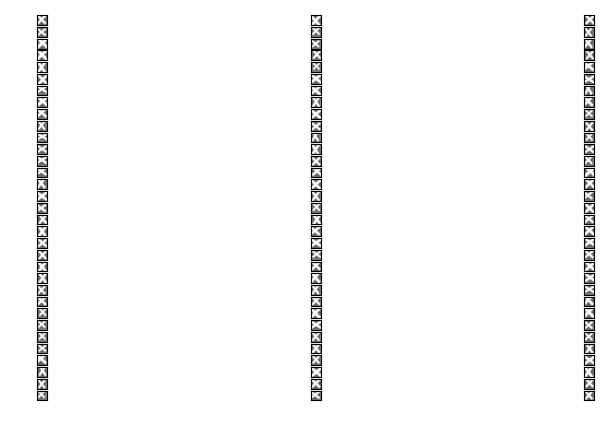

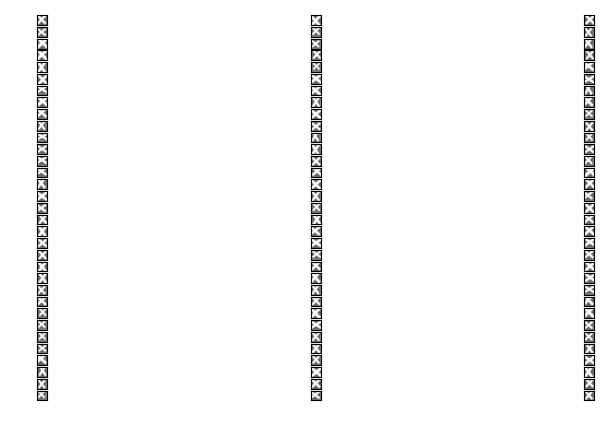

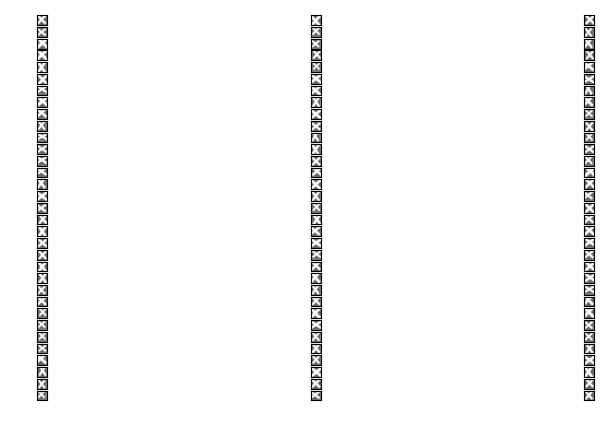

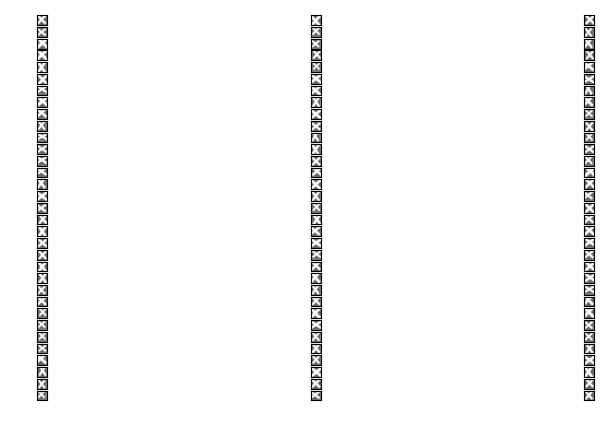

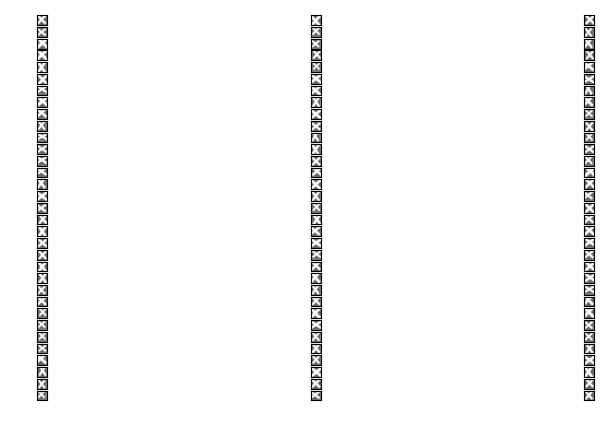

In [10]:
datagen = ImageDataGenerator(rotation_range = 0.5,width_shift_range = 0.1,height_shift_range = 0.1,zoom_range = [0.7, 1.3],fill_mode="constant", cval=125)
show2(datagen, img_cake)
datagen = ImageDataGenerator(rotation_range = 0.5,width_shift_range = 0.1,height_shift_range = 0.1,zoom_range = [0.7, 1.3],fill_mode="constant", cval=125)
show2(datagen, img_cake)
datagen = ImageDataGenerator(rotation_range = 0.5,width_shift_range = 0.1,height_shift_range = 0.1,zoom_range = [0.7, 1.3],fill_mode="constant", cval=125)
show2(datagen, img_cake)
datagen = ImageDataGenerator(rotation_range = 0.5,width_shift_range = 0.1,height_shift_range = 0.1,zoom_range = [0.7, 1.3],fill_mode="constant", cval=125)
show2(datagen, img_cake)
datagen = ImageDataGenerator(rotation_range = 0.5,width_shift_range = 0.1,height_shift_range = 0.1,zoom_range = [0.7, 1.3],fill_mode="constant", cval=125)
show2(datagen, img_cake)
datagen = ImageDataGenerator(rotation_range = 0.5,width_shift_range = 0.1,height_shift_range = 0.1,zoom_range = [0.7, 1.3],fill_mode="constant", cval=125)
show2(datagen, img_cake)